<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

# Data Gathering

In [41]:
df=pd.read_csv("car_dataset.csv") 
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Data Preparation

In [42]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [44]:
df.drop(columns=df.columns[0], 
        axis=1, 
        inplace=True)

In [45]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [46]:
df["Car_Age"] = 2018-df["Year"]


In [47]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,4
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,5
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,1
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,7
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,4


In [48]:
df.drop(columns=df.columns[0], 
        axis=1, 
        inplace=True)

In [49]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,4
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,5
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,1
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,7
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,4


In [50]:
fuel_dumies = df["Fuel_Type"].str.get_dummies()
fuel_dumies

,CNG,Diesel,Petrol
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
296,0,1,0
297,0,0,1
298,0,0,1
299,0,1,0


In [51]:
df = pd.concat([df,fuel_dumies], axis=1)


In [52]:
seller_dumies = df["Seller_Type"].str.get_dummies()
transmission_dumies = df["Transmission"].str.get_dummies()
df = pd.concat([df,seller_dumies], axis=1)
df = pd.concat([df,transmission_dumies], axis=1)

In [53]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age,CNG,Diesel,Petrol,Dealer,Individual,Automatic,Manual
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,4,0,0,1,1,0,0,1
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,5,0,1,0,1,0,0,1
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,1,0,0,1,1,0,0,1
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,7,0,0,1,1,0,0,1
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,4,0,1,0,1,0,0,1


In [56]:
df.drop(columns=df.columns[3],   # I runned 3 times
        axis=1, 
        inplace=True)

In [57]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,CNG,Diesel,Petrol,Dealer,Individual,Automatic,Manual
0,3.35,5.59,27000,0,4,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,5,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,1,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,7,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,4,0,1,0,1,0,0,1


In [37]:
df.describe()

AttributeError: 'NoneType' object has no attribute 'describe'

In [59]:
df = df.rename(columns = {'Diesel': 'Fuel_Type_Diesel','Petrol': 'Fuel_Type_Petrol','CNG': 'Fuel_Type_CNG'}, inplace = False)
df

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Dealer,Individual,Automatic,Manual
0,3.35,5.59,27000,0,4,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,5,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,1,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,7,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,4,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,2,0,1,0,1,0,0,1
297,4.00,5.90,60000,0,3,0,0,1,1,0,0,1
298,3.35,11.00,87934,0,9,0,0,1,1,0,0,1
299,11.50,12.50,9000,0,1,0,1,0,1,0,0,1


In [61]:
df = df.rename(columns = {'Automatic': 'Transmission_Automatic','Manual': 'Transmission_Manual','Individual': 'Seller_Type_Individual',"Dealer":"Seller_Type_Dealer"}, inplace = False)
df

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,4,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,5,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,1,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,7,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,4,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,2,0,1,0,1,0,0,1
297,4.00,5.90,60000,0,3,0,0,1,1,0,0,1
298,3.35,11.00,87934,0,9,0,0,1,1,0,0,1
299,11.50,12.50,9000,0,1,0,1,0,1,0,0,1


In [62]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,4,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,5,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,1,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,7,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,4,0,1,0,1,0,0,1


In [64]:
df.Owner.value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

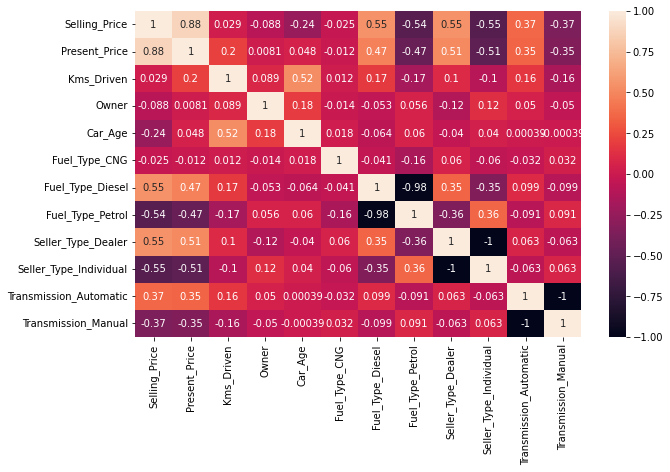

In [69]:
sns.heatmap(df.corr(), annot=True);

# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


### Features and target variable

In [70]:
X = df.drop(["Selling_Price"],axis=1)
y= df["Selling_Price"]


### Splitting data into training and testing

In [72]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=101)


##  Model Building (Linear Regression)

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [76]:
lr_model = LinearRegression() # 
lr_model.fit(X_train_scaled,y_train)

print("R2_train:", lr_model.score(X_train_scaled,y_train), "\nR2_test:", lr_model.score(X_test_scaled,y_test))

R2_train: 0.8971550971110224 
R2_test: 0.6067669579156916


# Interpret the model

In [77]:
pd.DataFrame(lr_model.coef_,X_train.columns, columns=["Coefs_"])

,Coefs_
Present_Price,40.237891
Kms_Driven,-2.003666
Owner,0.821047
Car_Age,-6.910988
Fuel_Type_CNG,-1.016587
Fuel_Type_Diesel,1.538938
Fuel_Type_Petrol,-0.522350
Seller_Type_Dealer,0.615292
Seller_Type_Individual,-0.615292
Transmission_Automatic,0.898338


# Model Evaluation

In [78]:
y_pred = lr_model.predict(X_test_scaled)

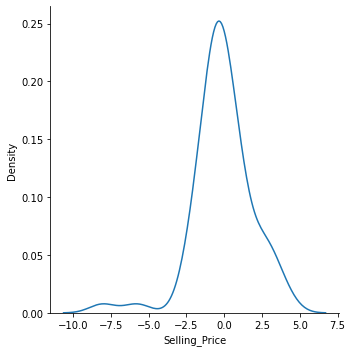

In [79]:
residuals = y_test-y_pred
sns.displot(residuals, kind="kde");

In [80]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,"residuals":residuals})
results.sort_values(by="residuals",ascending=False)

,Actual,Predicted,residuals
189,0.20,-3.920013,4.120013
200,0.10,-3.530147,3.630147
199,0.12,-2.986165,3.106165
212,11.25,8.189931,3.060069
190,0.20,-2.479385,2.679385
...,...,...,...
74,4.90,7.051441,-2.151441
70,3.95,6.153367,-2.203367
81,4.75,7.213736,-2.463736
78,5.25,11.016906,-5.766906


In [81]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [82]:
def eval_model(y_test,y_pred):
    rmse=(mean_squared_error(y_test,y_pred)**.5)
    mae=mean_absolute_error(y_test,y_pred)
    R2_score=r2_score(y_test,y_pred)
    print(f"rmse:\t\t{rmse }")
    print(f"mae:\t\t{mae }")
    print(f"R2_score:\t{R2_score }")
    return R2_score

In [83]:
eval_model(y_test,y_pred), "train R2: ",lr_model.score(X_train_scaled, y_train),"test R2: ",lr_model.score(X_test_scaled, y_test)

rmse:		1.943837658082281
mae:		1.3336356477119486
R2_score:	0.6067669579156916


(0.6067669579156916,
 'train R2: ',
 0.8971550971110224,
 'test R2: ',
 0.6067669579156916)

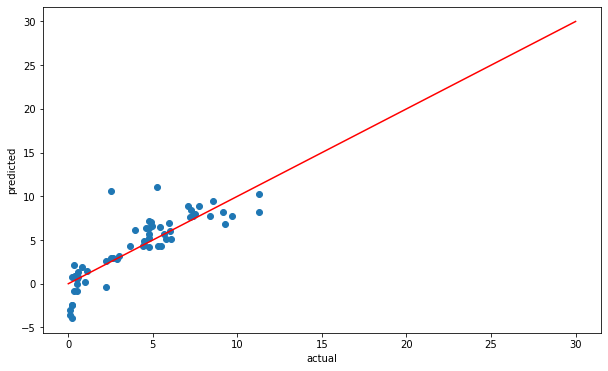

In [84]:
plt.scatter(y_test,y_pred,)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.plot([0,30],[0,30],"r");

# Regularization

# Ridge

In [89]:
from sklearn.linear_model import Ridge, RidgeCV

In [90]:
ridge_model = Ridge()
ridge_model.fit(X_train_scaled,y_train)

Ridge()

In [91]:
ridge_model.score(X_train_scaled,y_train),ridge_model.score(X_test_scaled,y_test)

(0.8412783038712925, 0.5804979610155119)

In [92]:
y_pred = ridge_model.predict(X_test_scaled)

In [93]:
eval_model(y_test,y_pred)

rmse:		2.007714834942993
mae:		1.538688750642222
R2_score:	0.5804979610155119


0.5804979610155119

In [94]:
ridge_model.alpha

1.0

In [95]:
ridgecv_model = RidgeCV(alphas=np.linspace(0.2, 10, 100),cv=10 ,scoring='neg_root_mean_squared_error')

ridgecv_model.fit(X_train_scaled,y_train)
y_pred = ridgecv_model.predict(X_test_scaled)
eval_model(y_test,y_pred), "alpha:", ridgecv_model.alpha_, "best score:", ridgecv_model.best_score_

rmse:		1.9195182781380686
mae:		1.3966276574772485
R2_score:	0.6165448950341892


(0.6165448950341892, 'alpha:', 0.2, 'best score:', -1.8969157357934523)

In [96]:
ridgecv_model = RidgeCV(alphas=np.linspace(0.01, 2, 100),cv=10,scoring='neg_root_mean_squared_error')

ridgecv_model.fit(X_train_scaled,y_train)
y_pred = ridgecv_model.predict(X_test_scaled)
eval_model(y_test,y_pred),"alpha:", ridgecv_model.alpha_, "best score:", ridgecv_model.best_score_

rmse:		1.9193593873555848
mae:		1.4049745061580998
R2_score:	0.6166083744609714


(0.6166083744609714,
 'alpha:',
 0.23111111111111113,
 'best score:',
 -1.8947805635741672)

In [97]:
y_train_pred = ridgecv_model.predict(X_train_scaled)   #wow 0.89 neler oluyor I dont know
eval_model(y_train,y_train_pred)

rmse:		1.8054903093695365
mae:		1.2222243879996333
R2_score:	0.890396649190854


0.890396649190854

In [98]:
ridge_model = Ridge(alpha=ridgecv_model.alpha_)   # haydaaa
ridge_model.fit(X_train_scaled,y_train)
y_pred = ridge_model.predict(X_test_scaled)
eval_model(y_test,y_pred)

rmse:		1.9193593873555848
mae:		1.4049745061580998
R2_score:	0.6166083744609714


0.6166083744609714

# Lasso

In [99]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [100]:
lasso_model = Lasso().fit(X_train_scaled,y_train)
y_pred = lasso_model.predict(X_test_scaled)
eval_model(y_test,y_pred), lasso_model.score(X_train_scaled,y_train), lasso_model.score(X_test_scaled,y_test)

rmse:		2.629898272287238
mae:		2.242487376000077
R2_score:	0.2802065014778278


(0.2802065014778278, 0.20242389703277275, 0.2802065014778278)

In [101]:
lasso_model.alpha

1.0

In [102]:
lassocv_model =LassoCV(alphas=np.linspace(0.01,10,100),cv=10).fit(X_train ,y_train)
y_pred = lassocv_model.predict(X_test)

print(eval_model(y_test,y_pred), 
      "\n\nR2_train:",lassocv_model.score(X_train, y_train), 
      "R2_test:",lassocv_model.score(X_test, y_test) ,"alpha:", lassocv_model.alpha_)

rmse:		1.8554938000941055
mae:		1.2876207117457563
R2_score:	0.6416981626899968
0.6416981626899968 

R2_train: 0.8968879415011598 R2_test: 0.6416981626899968 alpha: 0.01


In [103]:
lassocv_model =LassoCV(alphas=np.linspace(0.0001,.5,100),cv=10).fit(X_train_scaled ,y_train)
y_pred = lassocv_model.predict(X_test_scaled)

print(eval_model(y_test,y_pred), 
      "\n\nR2_train:",lassocv_model.score(X_train_scaled, y_train), 
      "R2_test:",lassocv_model.score(X_test_scaled, y_test) 
      ,"alpha:", lassocv_model.alpha_)

rmse:		1.7478962148404262
mae:		1.2881948246161357
R2_score:	0.6820481883905298
0.6820481883905298 

R2_train: 0.8906656947107525 R2_test: 0.6820481883905298 alpha: 0.030396969696969697


In [104]:
lasso_model = Lasso(alpha= lassocv_model.alpha_).fit(X_train_scaled,y_train)
y_pred = lasso_model.predict(X_test_scaled)

print(eval_model(y_test,y_pred), 
      "\n\nR2_train:",lasso_model.score(X_train_scaled, y_train), 
      "R2_test:",lasso_model.score(X_test_scaled, y_test) ,
      "alpha:", lasso_model.alpha)


rmse:		1.7478962148404262
mae:		1.2881948246161357
R2_score:	0.6820481883905298
0.6820481883905298 

R2_train: 0.8906656947107525 R2_test: 0.6820481883905298 alpha: 0.030396969696969697


In [105]:
#############################################################################################################################

## Elastic-Net 

In [106]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

In [107]:
el_model = ElasticNet().fit(X_train_scaled,y_train)
y_pred = el_model.predict(X_test_scaled)
eval_model(y_test,y_pred)

rmse:		2.5055045183975144
mae:		2.1368005108529915
R2_score:	0.3466883531071653


0.3466883531071653

In [108]:
el_model.score(X_train_scaled,y_train),el_model.score(X_test_scaled,y_test)

(0.2688281956723434, 0.3466883531071653)

In [112]:
elcv_model = ElasticNetCV(alphas = np.linspace(.001,1,100), l1_ratio = [.1, .5, .7, .9, .95, .99, 1]).fit(X_train_scaled,y_train)

y_pred = elcv_model.predict(X_test_scaled)

elcv_model.score(X_train_scaled,y_train),elcv_model.score(X_test_scaled,y_test)

C:\Users\Burya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5500312000731356, tolerance: 0.5311462882812501
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Burya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7005420941234206, tolerance: 0.5311462882812501
  model = cd_fast.enet_coordinate_descent_gram(


(0.8912914077593882, 0.6417202098604573)

In [114]:
elcv_model.alpha_, elcv_model.l1_ratio_

(0.011090909090909092, 0.95)

In [115]:
eval_model(y_pred, y_test)

rmse:		1.8554367127264781
mae:		1.3601479142584232
R2_score:	0.7394458594667792


0.7394458594667792

In [116]:
from sklearn.model_selection import GridSearchCV

In [117]:
model = ElasticNet()
params = {"alpha":np.linspace(.001,1,100), "l1_ratio":[.1, .5, .7, .9, .95, .99, 1]}
gr_model = GridSearchCV(model, params)
gr_model.fit(X_train_scaled, y_train)


GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': array([0.001     , 0.01109091, 0.02118182, 0.03127273, 0.04136364,
       0.05145455, 0.06154545, 0.07163636, 0.08172727, 0.09181818,
       0.10190909, 0.112     , 0.12209091, 0.13218182, 0.14227273,
       0.15236364, 0.16245455, 0.17254545, 0.18263636, 0.19272727,
       0.20281818, 0.21290909, 0.223     , 0.23309091, 0.24318182,
       0.25327273, 0.26336364, 0.273...
       0.70736364, 0.71745455, 0.72754545, 0.73763636, 0.74772727,
       0.75781818, 0.76790909, 0.778     , 0.78809091, 0.79818182,
       0.80827273, 0.81836364, 0.82845455, 0.83854545, 0.84863636,
       0.85872727, 0.86881818, 0.87890909, 0.889     , 0.89909091,
       0.90918182, 0.91927273, 0.92936364, 0.93945455, 0.94954545,
       0.95963636, 0.96972727, 0.97981818, 0.98990909, 1.        ]),
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]})

In [118]:
y_pred = gr_model.predict(X_test_scaled)
eval_model(y_test,y_pred), "best score:", gr_model.best_score_, "best params:", gr_model.best_params_

rmse:		1.770898661325729
mae:		1.3085965964857476
R2_score:	0.6736245832688421


(0.6736245832688421,
 'best score:',
 0.8371905925732502,
 'best params:',
 {'alpha': 0.021181818181818184, 'l1_ratio': 0.99})

In [119]:
y_train_pred = gr_model.predict(X_train_scaled)  # What is going on??
eval_model(y_train,y_train_pred)

rmse:		1.798227692933536
mae:		1.2082049968074302
R2_score:	0.8912766385396201


0.8912766385396201